# Hydration Model

By Gail Romer and Maia Materman


## A Bit of Background Information:

In this project, we wanted to investigate the way in which water travels through the body. Thankfully, we were able to find a research paper which looked at this phenomenon. From this paper, we were able to draw a stock and flow diagram and ask a few questions as to the way in which water moves between tissue compartments. The question we decided to focus on was;
##### How does a varied input rate into the tissue effect the amount of water in each compartment over time?
Answering this question involves sweeping the input rate and plotting the amount of water in each stock over time.
For reference, the paper is titled Pharmacokinetic Analysis of Absorption, Distribution and Disappearance of Ingested Water Labeled with D2O in Humans.

A thorough analysis of this paper led us to a few questions, one of which we looked at in depth.
## Our Question:


In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [3]:
def make_system(ka, k12, k21, kel):
    """Make a system object for the water model.
    
    ka (per minute)
    k12 (per minute)
    k21 (per minute)
    kel (per minute)
    
    returns: System object
    """
   
    
    init = State(V_1 = 18.5, V_2 = 31.6)   # V_1 = Compartment 1, V_2 = Compartment 2
                                        

    t0 = 0 # time has yet to begin
    dt = 1 # minutes
    t_end = 3 * 60 # 3 hours
    

    return System(init=init, t0=t0, t_end=t_end,
                  ka=ka, k12=k12, k21=k21, kel=kel, dt=dt)


make_system(
            0.0715,       #ka per minute
            0.0384,       #k12 per minute
            0.0223,       #k21 per minute
            0.241         #kel per minute
)

,values
init,V_1 18.5 V_2 31.6 dtype: float64
t0,0
t_end,180
ka,0.0715
k12,0.0384
k21,0.0223
kel,0.241
dt,1


In [17]:
def plot_results(V_1, V_2):
    """Plot the results of water model.
    
    V_1: TimeSeries
    V_2: TimeSeries
    
    """
    
    

In [18]:
def run_simulation(system, update_func, KA):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init

    
    for t in linrange(t0, t_end, dt):
        frame.row[t+dt] = update_func(frame.row[t], dt, system, KA)

    return frame

In [33]:
# # Original

def update_func(state, dt, system,KA):
    """Update the water model.
    
    state: State (V_1, V_2)
    t: time
    system: System object
    
    returns: State (V_1, V_2)
    """
    
    unpack(system)
    v_1, v_2 = state
    
    
    
    kel_1 = (v_1/(v_1+v_2)) * kel
    kel_2 = (v_2/(v_1+v_2)) * kel
    
    dv1dt = KA + k21 - k12 - kel_1
    dv2dt = k12 - k21 - kel_2
    
    v_1 += dv1dt * dt
    v_2 += dv2dt * dt
    
    return State(V_1 = v_1, V_2 = v_2)

In [61]:
system = make_system(0.0715,       #ka per minute
            0.0384,        #k12 per minute
            0.0223,     #k21 per minute
            0.241         #kel per minute
           )
            
ka_1=0.02
ka_2=0.12

sweep_ka = SweepSeries() # Array to hold swept ka model data
ka_array = linspace(ka_1, ka_2, 10)

# KA=0.0715

# results = run_simulation(system, update_func, KA)
i=0
for KA in ka_array:
    i += 1
    
    results = run_simulation(system, update_func, KA)
    sweep_ka[i] = results

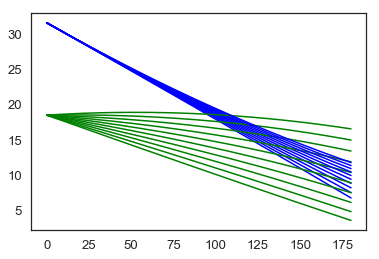

In [67]:
def plot_sweepseries(sweepseries):
    c = 1
    while c < 11 :
        v1 = sweepseries[c].V_1
        v2 = sweepseries[c].V_2
        
        v1.plot(label = "V_1", color="green")
        v2.plot(label = "V_2", color="blue")
        c += 1
        
    return

plot_sweepseries(sweep_ka)

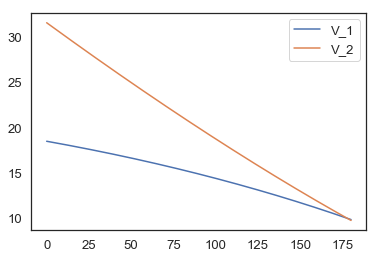

In [8]:
results.plot()

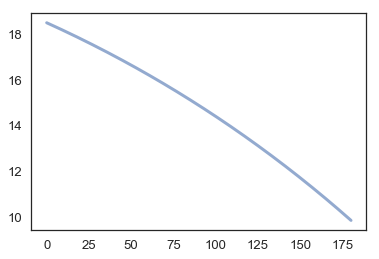

In [13]:
plot(results.V_1)

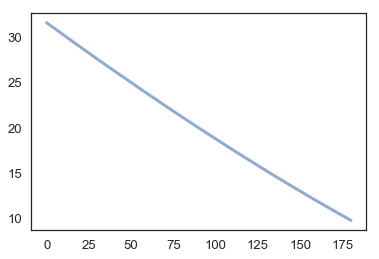

In [14]:
plot(results.V_2)